In [1]:
## 9장에서는 스택과 큐를 구분해서 살펴봤다. 
## 각각 특징이 뚜렷하지만 별도로 구분해 사용하기가 번거로운 만큼,
## 한 번에 두 자료형의 특징을 모두 갖고 있는 복합 자료형이 있다면 훨씬 더 간편하게 사용할 수 있을 것 같다.

## 10장에서는 스택과 큐의 연산을 모두 갖고 있는 복합 자료형인 데크와 추출 순서가 일정하게 정해져 있지 않은
## 우선순위 큐에 대해 살펴본다.

# 데크

In [2]:
## 이전 장에서 원형 큐를 구현하면서 Front()와 Rear()를 모두 구현한 바 있다.
## 사실 Front()는 큐의 연산이 맞지만 Rear()는 큐에 정의되어 있지 않은 연산이라는 점도 얘기한 바 있다.
## 이 연산은 데크에 존재하는 연산으로, 데크의 정의는 다음과 같다.

## 데크는 Double Ended Queue의 줄임말로, 글자 그대로 양쪽 끝을 모두 추출할 수 있는, 
## 큐를 일반화한 형태의 추상자료형이다.

In [3]:
## 데크는 양쪽에서 삭제와 삽입을 모두 처리할 수 있으며, 스택과 큐의 특징을 모두 갖고 있다.
## 이 추상 자료형의 구현은 배열이나 연결리스트 모두 가능하지만,
## 이중 연결리스트로 구현하는 편이 가장 잘 어울린다.

In [4]:
## 이중 연결리스트로 구현하게 되면 양쪽으로 head와 tail이라는 이름의 두 포인터를 갖고 있다가
## 새로운 아이템이 추가될 때마다 앞쪽 또는 뒤쪽으로 연결시켜 주기만 하면 된다.
## 연결 후에는 포인터를 이동하면 된다.
## 파이썬은 데크 자료형을 다음과 같이 collections 모듈에서 deque라는 이름으로 지원한다.

## 이제 이중 연결 리스트를 이용해 데크 자료형을 직접 구현하는 문제를 풀이해보자.

# 26. 원형 데크 디자인

### LeetCode 641. Design Circular Deque

##### 다음 연산을 제공하는 원형 데크를 디자인하라

In [5]:
## Your implementation should support following operations:

## MyCircularDeque(k): Constructor, set the size of the deque to be k.
## insertFront(): Adds an item at the front of Deque. Return true if the operation is successful.
## insertLast(): Adds an item at the rear of Deque. Return true if the operation is successful.
## deleteFront(): Deletes an item from the front of Deque. Return true if the operation is successful.
## deleteLast(): Deletes an item from the rear of Deque. Return true if the operation is successful.
## getFront(): Gets the front item from the Deque. If the deque is empty, return -1.
## getRear(): Gets the last item from Deque. If the deque is empty, return -1.
## isEmpty(): Checks whether Deque is empty or not. 
## isFull(): Checks whether Deque is full or not.

In [6]:
## MyCircularDeque circularDeque = new MycircularDeque(3); // set the size to be 3
## circularDeque.insertLast(1);			// return true
## circularDeque.insertLast(2);			// return true
## circularDeque.insertFront(3);			// return true
## circularDeque.insertFront(4);			// return false, the queue is full
## circularDeque.getRear();  			// return 2
## circularDeque.isFull();				// return true
## circularDeque.deleteLast();			// return true
## circularDeque.insertFront(4);			// return true
## circularDeque.getFront();			// return 4

##### 풀이 1 이중 연결 리스트를 이용한 데크 구현

In [7]:
## 25번 문제에서는 원형 큐를 배열로 구현했으므로, 이번에는 실제 파이썬의 데크 구현체이기도 한
## 이중 연결 리스트로 구현해보자. 또한 이 데크 구현 문제의 경우 원형 큐 구현 문제와 달리
## 맨 앞에 노드를 추가하는 insertFront() 연산도 있다. 
## 일반적인 배열로는 맨 앞에 요소를 추가하는 작업의 시간 복잡도는 O(n)이기 때문에 구현이 쉽지 않다.
## 그러나 연결 리스트는 맨 앞에 노드를 추가하는 작업이 그리 어렵지 않다.

In [8]:
class ListNode:
    def __init__(self, item):
        self.val = item
        self.next = None

In [9]:
class MyCircularDeque:
    def __init__(self, k: int):
        self.head, self.tail = ListNode(None), ListNode(None)
        self.k, self.len = k, 0
        self.head.right, self.tail.left = self.tail, self.head
        
    def _add(self, node: ListNode, new: ListNode):
        n = node.right
        node.right = new
        new.left, new.right = node, n
        n.left = new
        
    def _del(self, node: ListNode):
        n = node.right.right
        node.right = n
        n.left = node
        
    def insertFront(self, value: int) -> bool:
        if self.len == self.k:
            return False
        self.len += 1
        self._add(self.head, ListNode(value))
        return True
    
    def insertLast(self, value: int) -> bool:
        if self.len == self.k:
            return False
        self.len += 1
        self._add(self.tail.left, ListNode(value))
        return True
    
    def deleteFront(self) -> bool:
        if self.len == 0:
            return False
        self.len -= 1
        self._del(self.head)
        return True
    
    def deleteLast(self) -> bool:
        if self.len == 0:
            return False
        self.len -= 1
        self._del(self.tail.left.left)
        return True
    
    def getFront(self) -> int:
        return self.head.right.val if self.len else -1
    
    def getRear(self) -> int:
        return self.tail.left.val if self.len else -1
    
    def isEmpty(self) -> bool:
        return self.len == 0
    
    def isFull(self) -> bool:
        return self.len == self.k

In [10]:
## 코드가 길어서 얼핏 어려워 보이지만 연산의 종류가 많을 뿐, 연결 리스트로 원형 데크를 구현하는 일은 어렵지 않다.
## 앞서 9장에서는 원형 큐를 배열로 구현해봤고, 이번에는 원형 데크를 연결 리스트로 구현해봤다.
## 그런데 사실 원형 데크를 이중 연결 리스트로 구현하게 되면 원형의 이점을 전혀 살릴 수 없게 된다.
## 이 문제는 데크를 소개하면서 이중 연결 리스트로 구현이 가능하다는 것을 보여주기 위한 구현일 뿐,
## 실제로 원형의 이점을 살리기 위해서라면 원래 이 문제는 연결 리스트가 아니라 배열로 풀이해야 한다.

## 원형으로 구현하는 이유는 뒤쪽으로 요소를 채우다가 공간이 다 차게되면 tail과 head를 연결해 앞쪽의 빈 공간을 활용하려는 의도인데
## 연결 리스트는 애초에 빈 공간이라는 개념이 존재하지 않기 때문에 원형은 아무런 의미가 없다.
## 또한 데크의 연산은 맨 처음과 맨 끝의 값을 추출할 뿐이며 맨 끝의 다음 값을 추출하는지 등의 연산은 존재하지 않기 때문에
## 서로 연결되어 있을 필요 또한 없다. 

# 우선순위 큐

In [11]:
## 우선순위 큐는 큐 또는 스택과 같은 추상 자료형과 유사하지만 추가로 각 요소의 '우선순위'와 연관되어 있다.

In [12]:
## 우선순위 큐는 어떠한 특정 조건에 따라 우선순위가 가장 높은 요소를 추출하는 자료형이다.
## 대표적으로 최댓값 추출을 들 수 있다.
## 예를 들어 큐에 [1, 4, 5, 3, 2]가 들어 있고 최댓값을 추출하는 우선순위 큐가 있다고 가정하자.
## 이 경우 항상 남아 있는 요소들의 최댓값이 우선순위에 따라 5, 4, 3, 2, 1 순으로 추출된다.

## 이는 정렬 알고리즘을 사용하면 우선순위 큐를 만들 수 있다는 의미이기도 하다.
## n개의 요소를 정렬하는 데 S(n)의 시간이 든다고 할 때, 새 요소를 삽입하거나 삭제하는 데는 O(S(n))의 시간이 걸린다.

## 내림차순으로 정렬했을 때 최댓값을 가져오는 데는 맨 앞의 값을 가져오기만 하면 되므로 O(1)로 가능하다.
## 대개 정렬에는 O(nlogn)이 필요하기 때문에 O(S(n))은 O(nlogn) 정도가 든다.
## 그러나 실제로는 단순 정렬보다 힙 정렬 등의 좀 더 효율적인 방법을 활용한다.

## 이외에도 최단 경로를 탐색하는 다익스트라(Dijkstra) 알고리즘 등 우선순위 큐는 다양한 분야에 활용되며
## 힙(Heap) 자료구조와도 관련이 깊다.

# 27. k개 정렬 리스트 병합

### LeetCode 23. Merge k Sorted Lists

##### k개의 정렬된 리스트를 1개의 정렬된 리스트로 병합하라

In [13]:
## 예제1
    ## input: [
    ##          1->4->5,
    ##          1->3->4,
    ##          2->6
    ##        ]
    
    ## output: 1->1->2->3->4->4->5->6
    

##### 풀이 1 우선순위 큐를 이용한 리스트 병합

In [14]:
## 이 문제는 우선순위 큐를 사용해 풀 수 있는 문제로, 리트코드에서는 이 문제의 난이도가 어려움으로 표기되어 있지만
## 사실 이 문제는 우선순위 큐를 사용하면 매우 쉽게 풀이할 수 있다.

## 앞서 우선순위 큐를 설명할 때 힙과 관련이 깊다고 했다. 특히 파이썬에서는 대부분의 우선순위 큐 풀이에
## 거의 항상 heapq 모듈을 사용하므로 잘 파악해두자.
## 왜 PriorityQueue 모듈을 사용하지 않고 heapq를 사용하는지는 나중에 다시 설명한다.

In [15]:
from typing import *
import heapq

def mergeKLists(lists: List[ListNode]) -> ListNode:
    root = result = ListNode(None)
    heap = []
    
    # 각 연결 리스트의 루트를 힙에 저장
    for i in range(len(lists)):
        if lists[i]:
            heapq.heappush(heap, (lists[i].val, i, lists[i]))
            
    # 힙 추출 이후 다음 노드는 다시 저장
    while heap:
        node = heapq.heappop(heap)
        idx = node[1]
        result.next = node[2]
        
        result = result.next
        if result.next:
            heapq.heappush(heap, (result.next.val, idx, result.next))
            
    return root.next

In [16]:
class ListNode:
    def __init__(self, item=0, Next=None):
        self.val = item
        self.next = Next

In [17]:
a = ListNode(1, ListNode(4, ListNode(5)))
b = ListNode(1, ListNode(3, ListNode(4)))
c = ListNode(2, ListNode(6))

lists = [a, b, c]

mergedlist = mergeKLists(lists)

In [18]:
while mergedlist:
    print(mergedlist.val)
    mergedlist = mergedlist.next

1
1
2
3
4
4
5
6


In [19]:
## heapq 모듈은 최소 힙(Min Heap)을 지원하며, 따라서 lst.val이 작은 순서대로 pop()할 수 있다. 
## 그런데 이렇게 저장하면 TypeError: '<' not supported between instances of 'ListNode' and 'ListNode'라는 에러가 발생한다.
## 이 에러 메세지는 '중복된 값을 넣을 수 없다.'라는 뜻이다.

## 이 문제의 예제로 제시한 입력값은 3개의 연결 리스트 중 첫 번재와 두 번째의 루트가 각각 1로 동일하다.
## 이렇게 동일한 값은 heappush() 함수에서 에러를 발생하기 때문에 중복된 값을 구분할 수 있는 추가 인자가 필요하다.
## 따라서 사용할 일은 없지만 오로지 에러를 방지하기 위한 용도로 연결 리스트의 순서를 삽입한다.
## for i in range(len(lists)):
##     ...
##     heapq.heappush(heap, (lists[i].val, i, lists[i]))

## 이제 heappop()으로 값을 추출하면 가장 작은 노드의 연결 리스트부터 차례대로 나오게 되며
## 이 값을 결과가 될 노드 result에 하나씩 추가한다. 
## 이렇게 힙에 아무 값도 남지 않을 때까지 반복하면 result에는 작은 노드부터 차례대로 연결된다.

## 우선순위 큐 문제는 힙 문제와 사실상 중복되므로, 다른 우선순위 큐 문제들은 15장에서 다시 풀이해본다.

In [20]:
## **** 파이썬 ****

    ## PriorityQueue vs heapq
        
        ## 파이썬에서 우선순위 큐는 queue 모듈의 PriorityQueue 클래스를 이용해 사용할 수 있다.
        ## PriorityQueue라는 이름 또한 뜻을 그대로 나타내므로 직관적이라 좋아 보인다.
        ## 그러나 우선순위 큐는 힙을 사용해 주로 구현하며, 파이썬의 PriorityQueue조차 내부적으로는
        ## heapq를 사용하도록 구현되어 있다.
        ## CPython에서 PriorityQueue 클래스는 파이썬 코드로 다음과 같이 선언되어 있다.
        
        ## cpython/Lib/queue.py
        ## class PriorityQueue(Queue):
        ##     ...
        ##     def _put(self, item):
        ##         heappush(self.queue, item)
        ## 
        ##     def _get(self):
        ##         return heappop(self.queue)
        
        ## 이 코드에서 보듯이 PriorityQueue 는 모두 heapq 모듈을 이용하므로 사실상 둘은 동일하다.
        ## 차이점은 PriorityQueue는 스레드 세이프(Thread-Safe) 클래스라는 점이며,
        ## heapq 모듈은 스레드 세이프를 보장하지 않는다.
        
        ## *** Thread-Safe : 멀티 스레드에도 안전한 프로그래밍 개념. 만약 스레드 세이프 하지 않은 경우
        ##                  1번 스레드의 값이 2번 스레드에서 변경될 수 있어 문제가 발생한다.
        
        ## 파이썬은 GIL의 특성상 멀티 스레딩이 거의 의미가 없기 때문에 대부분 멀티 프로세싱으로 활용한다는 점을 생각해보면,
        ## PriorityQueue 모듈의 멀티 스레딩 지원은 사실 큰 의미는 없다.
        
        ## *** GIL(Global Interpreter Lock) : CPython에서의 GIL은 Python 코드(bytecode)를 실행할 때에 여러 thread를 사용할 경우, 
        ##                                    단 하나의 thread만이 Python object에 접근할 수 있도록 제한하는 mutex 이다. 
        ##                                    그리고 이 lock이 필요한 이유는 CPython이 메모리를 관리하는 방법이 
        ##                                    thread-safe하지 않기 때문이다.

        ## 또한 스레드 세이프를 보장한다는 얘기는 내부적으로 Locking을 제공한다는 의미이므로 
        ## Locking Overhead가 발생해 성능에 영향을 끼친다.
        ## 따라서 굳이 멀티 스레드로 구현할 게 아니라면 PriorityQueue 모듈은 사용할 필요가 없다.
        
        ## 실무에서도 우선순위 큐는 대부분 heapq로 구현하고 있으며, 이 책에 등장하는 모든 우선순위 큐를 
        ## 사용하는 문제 풀이 또한 heapq를 사용해 풀이한다.

In [21]:
## **** 파이썬 ****

    ## 파이썬 전역 인터프리터 락(GIL)
    
        ## 아마도 '파이썬은 왜 느린가?'를 얘기할 때 가장 자주 듣게 되는 얘기가 GIL이 아닐까 싶다.
        ## 파이썬 최초의 공식 구현체인 CPython은 개발 초기에 번거로운 동시성 관리를 편리하게 하고
        ## 스레드 세이프하지 않은 CPython의 메모리 관리를 쉽게 하기 위해, GIL로 파이썬 객체에 대한 접근을
        ## 제한하는 형태로 설계했다.

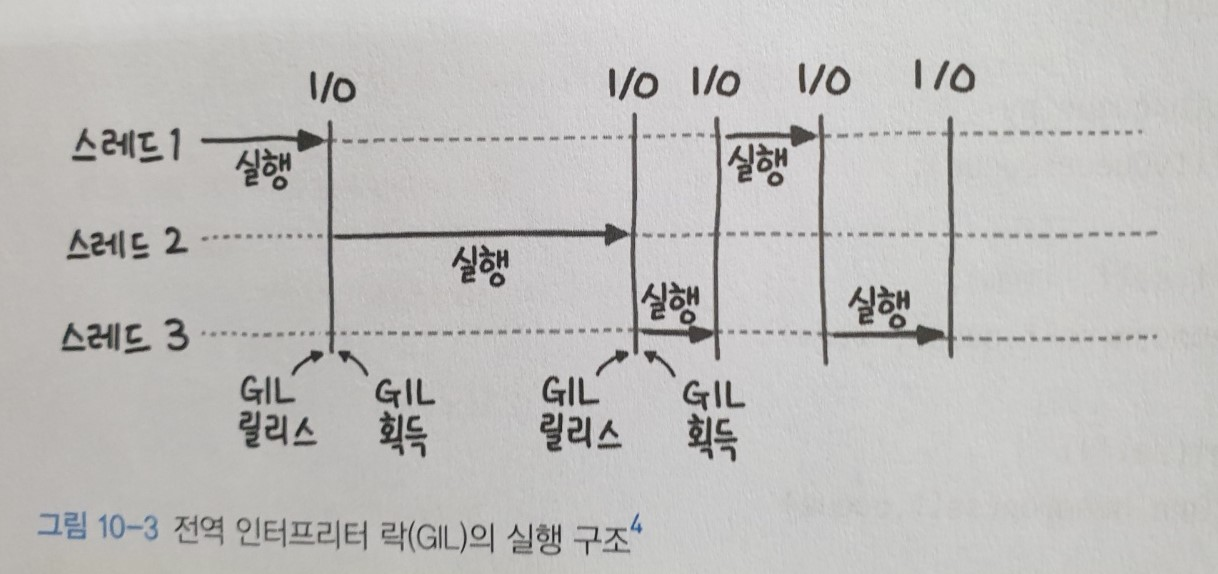

In [22]:
from IPython.display import Image

Image('그림10-3.jpg', width = 500, height = 400)

In [23]:
        ## GIL은 하나의 스레드가 자원을 독점하는 형태로 실행된다.
        ## CPython 개발이 시작된 것이 1994년이었으니, CPU가 하나던 당시에는 충분히 그런 선택을 할 만했고,
        ## GIL 디자인에는 아무런 문제가 없었다.
        ## 하지만 지금처럼 멀티 코어가 당연한 세상에서, 하나의 스레드가 자원을 독점하는 형태로 실행되는 제약은 매우 치명적이다.
        
        ## 최근들어 PriorityQueue 모듈을 비롯해, 한계를 극복하기 위한 다양한 시도를 하고 있지만 
        ## 이미 과거부터 GIL에 의존하는 형태로 구현된 기능들이 대부분을 차지하고 있어,
        ## 이러한 제약을 극복하기 쉽지 않다.
        ## 여러 차례 GIL을 걷어내려는 시도가 있어 왔지만 지금까지도 GIL은 파이썬의 주요 특징으로 남아있다.